The number of peaks is 1 , Peaks_x= [39.1]
The number of valley is 1 , Valley_x= [-55.3]


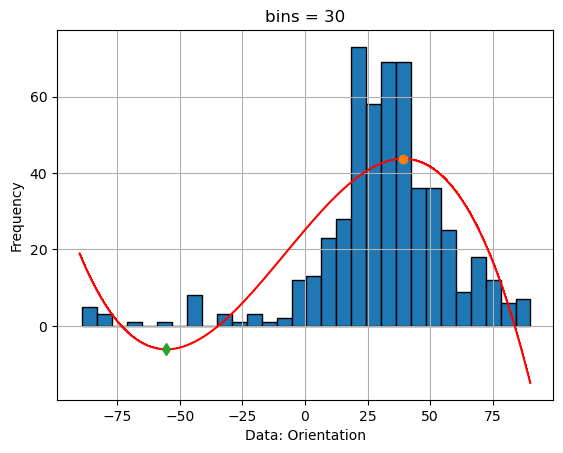

df_4 

fitting in peak±90 

μ= 32.058660013574645
σ= 17.40632523723502
Orientation= 32.058660013574645


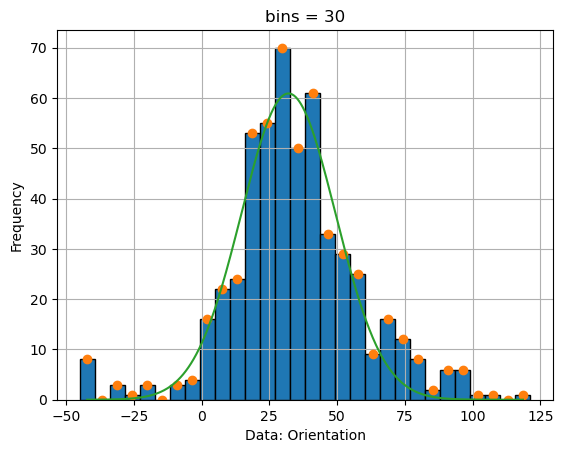

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy.signal import find_peaks
from scipy.signal import argrelextrema
from astropy.modeling import models, fitting


df=pd.read_excel('BEND3-cnf-no Flow-P.xlsx', sheet_name='Sheet7')
df_data=df['ActinLine']
df_numpy=df_data.to_numpy(dtype ='float32')
x_data=df_numpy

#Calculate bins
n_bins=len(df_data)

if n_bins<30:
    print(n_bins,"Sample size is too small")
else:
    orient_dist = pd.Series(df_data)

q1 = orient_dist.quantile(0.25)
q3 = orient_dist.quantile(0.75)
iqr = q3 - q1

bin_width = (2 * iqr) / (len(orient_dist) ** (1 / 3))
bin_count = int(np.ceil((orient_dist.max() - orient_dist.min()) / bin_width))

plt.title(f'bins = {bin_count}')

#plotting the histogram
hist, bin_edges = np.histogram(x_data,bins = bin_count)
plt.hist(x_data,bins = bin_count,edgecolor = 'k')


#Extract the scatter points from the histogram
n_hist = len(hist)
x_hist=np.zeros((n_hist),dtype=float) 

for ii in range(n_hist):
    x_hist[ii]=(bin_edges[ii+1]+bin_edges[ii])/2
    
y_hist=hist

#Polynomial fit the scatter points from the histogram
poly = np.polyfit(x_hist, y_hist, deg=3)


x = np.arange(-90,90,0.1)
y = np.polyval(poly,x)
plt.plot(x,y,'r,-') 

num_peak = peaks, _ = find_peaks(y)
plt.plot(x[peaks], y[peaks], "o")
print('The number of peaks is ' + str(len(num_peak[0])),', Peaks_x=',x[peaks])

valley = argrelextrema(y,np.less)[0]
plt.plot(x[valley], y[valley], "d")
print('The number of valley is ' + str(len(valley)),', Valley_x=',x[valley])

#setting the label,title and grid of the plot
plt.title(f'bins = {bin_count}')
plt.xlabel("Data: Orientation")
plt.ylabel("Frequency")
plt.grid("on")
plt.show()

p_n = int(len(num_peak[0]))
v_n = int(len(valley))

data_1 = x_data + 180
data_2 = x_data - 180
data_set_1 = np.append(data_1,x_data)
data_set = np.append(data_set_1,data_2)
   
if (p_n == 0 and v_n == 0) or p_n >= 2:
    ( print('Random \n'))

elif p_n == 0 and v_n == 1:
    
    df_3 = data_set[:][(data_set[:]>x[valley]) & (data_set[:]<= (x[valley] + 180))] 
    print('fitting in valley+180 \n')
    #plotting the histogram
    hist_fit, bin_edges = np.histogram(df_3,bins = bin_count)
    plt.hist(df_3,bins = bin_count,edgecolor = 'k')
    #Extract the scatter points from the histogram
    n_hist_df_3 = len(hist_fit)
    x_hist_df_3 = np.zeros((n_hist_df_3),dtype=float) 
    for ii in range(n_hist_df_3):
        x_hist_df_3[ii] = (bin_edges[ii+1]+bin_edges[ii])/2
        y_hist_df_3 = hist_fit
    plt.plot(x_hist_df_3, y_hist_df_3, 'o') 
    # Recast xdata and ydata into numpy arrays so we can use their handy features
    x_fit = np.asarray(x_hist_df_3, dtype=object)
    y_fit = np.asarray(y_hist_df_3, dtype=object)
    #Gaussian fitting
    def fit_gaosi(data, bins):
        g_init = models.Gaussian1D(amplitude = np.max(hist_fit), mean = np.mean(df_3), stddev = np.std(df_3))
        fig_g = fitting.LevMarLSQFitter()
        g = fig_g(g_init, x_fit, y_fit)
        return g.mean.value, g.stddev.value, g
    miu, sigma, g = fit_gaosi(df_3, bins = bin_count)
    x_3 = np.linspace(np.min(x_fit),np.max(x_fit),500)
    y_3 = g(x_3)
    plt.plot(x_3,y_3)
    orientation = g.mean.value - 180
    print('μ=', g.mean.value)
    print('σ=', g.stddev.value)
    print('Orientation=', orientation)
    #setting the label,title and grid of the plot
    plt.title(f'bins = {bin_count}')
    plt.xlabel("Data: Orientation")
    plt.ylabel("Frequency")
    plt.grid("on")
    plt.show()
    
elif p_n == 1:
    df_4 = data_set[:][(data_set[:]>(x[peaks]-90)) & (data_set[:]<= (x[peaks] + 90))] 
    print('df_4 \n')
    print('fitting in peak±90 \n')
    #plotting the histogram
    hist_fit, bin_edges = np.histogram(df_4,bins = bin_count)
    plt.hist(df_4,bins = bin_count,edgecolor = 'k')
    #Extract the scatter points from the histogram
    n_hist_df_4 = len(hist_fit)
    x_hist_df_4 = np.zeros((n_hist_df_4),dtype=float) 
    for ii in range(n_hist_df_4):
        x_hist_df_4[ii] = (bin_edges[ii+1]+bin_edges[ii])/2
        y_hist_df_4 = hist_fit
    plt.plot(x_hist_df_4, y_hist_df_4, 'o') 
     # Recast xdata and ydata into numpy arrays so we can use their handy features
    x_fit = np.asarray(x_hist_df_4, dtype=object)
    y_fit = np.asarray(y_hist_df_4, dtype=object)
    #Gaussian fitting
    def fit_gaosi(data, bins):
        g_init = models.Gaussian1D(amplitude = np.max(hist_fit), mean = np.mean(df_4), stddev = np.std(df_4))
        fig_g = fitting.LevMarLSQFitter()
        g = fig_g(g_init, x_fit, y_fit)
        return g.mean.value, g.stddev.value, g
    miu, sigma, g = fit_gaosi(df_4, bins = bin_count)
    x_4 = np.linspace(np.min(x_fit),np.max(x_fit),500)
    y_4 = g(x_4)
    plt.plot(x_4,y_4)
    orientation = g.mean.value
    print('μ=', g.mean.value)
    print('σ=', g.stddev.value)
    print('Orientation=', orientation)
    #setting the label,title and grid of the plot
    plt.title(f'bins = {bin_count}')
    plt.xlabel("Data: Orientation")
    plt.ylabel("Frequency")
    plt.grid("on")
    plt.show()
    
else:
    print('Please process the data manually \n')
    
    

In [ ]:
 # Recast xdata and ydata into numpy arrays so we can use their handy features
    x_fit = np.asarray(x_hist_df_4, dtype=object)
    y_fit = np.asarray(y_hist_df_4, dtype=object)
    #Gaussian fitting
    def fit_gaosi(data, bins):
        g_init = models.Gaussian1D(amplitude = np.max(hist_fit), mean = np.mean(df_4), stddev = np.std(df_4))
        fig_g = fitting.LevMarLSQFitter()
        g = fig_g(g_init, x_fit, y_fit)
        return g.mean.value, g.stddev.value, g
    miu, sigma, g = fit_gaosi(df_4, bins = bin_count)
    x_4 = np.linspace(np.min(x_fit),np.max(x_fit),500)
    y_4 = g(x_4)
    plt.plot(x_4,y_4)
    orientation = g.mean.value
    print('μ=', g.mean.value)
    print('σ=', g.stddev.value)
    print('Orientation=', orientation)